1. SQL (Write SQL queries to accomplish this.  When I say 'display' I mean write a select query.)
- Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"
- Find all actors whose last name contains the letters "LI"
- List the last names of actors, as well as the amount of actors who have that last name
- Display the first name, last name, full address, and total payment amount collected in 2005 for each staff member.
- Display all actors who appear in the film Alone Trip
- What customer had the highest amount of rentals in 2005?
- What store had the highest number of rentals for family movies?
2. Python (Use a combination of queries using psycopg2 and pandas code to answer the following)
- Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20
- Create a graphic that compares the amount of sales each store has brought in.
- Create a python function that will display a graphic the showcases the top N genres by gross revenue.
- Create a graphic showing the average replacement cost by category
- Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)
- For each category, on average how many rentals of a film need to occur to cover the replacement cost?
3. Analysis

The owner of these rental stores is working on making an infographic to share with investors that will showcase how each store is doing financially.  She wants you to create at least 4 graphics that she can include in her presentation that will be relevant to her.  These graphics should be designed to provide a clear, concise, and visually appealing overview of how the stores are doing.

Please ensure all your work is in a github repository.  It should be named firstname-lastname-pagila-assignment
(For me it would be max-feige-pagila-assignment)


- Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"

In [1]:
# SELECT DISTINCT(first_name || ' ' || last_name) AS "Actor Name"  
# FROM film_actor f
# INNER JOIN 
# actor a
# ON f.actor_id = a.actor_id

In [2]:
# - Find all actors whose last name contains the letters "LI"

In [3]:
# SELECT DISTINCT(first_name || ' ' || last_name) AS "Actor Name"  
# FROM film_actor f
# INNER JOIN 
# actor a
# ON f.actor_id = a.actor_id
# WHERE a.last_name LIKE '%LI%';


# "HUMPHREY WILLIS"
# "AUDREY OLIVIER"
# "MORGAN WILLIAMS"
# "GREG CHAPLIN"
# "CUBA OLIVIER"
# "GENE WILLIS"
# "SEAN WILLIAMS"
# "BEN WILLIS"
# "GROUCHO WILLIAMS"
# "WOODY JOLIE"

In [4]:
# - List the last names of actors, as well as the amount of actors who have that last name

In [5]:
# SELECT DISTINCT(last_name),COUNT(last_name)   
# FROM film_actor f
# INNER JOIN 
# actor a
# ON f.actor_id = a.actor_id
# WHERE a.last_name LIKE '%LI%'
# GROUP BY a.last_name


# "CHAPLIN"	27
# "JOLIE"	31
# "OLIVIER"	53
# "WILLIAMS"	78
# "WILLIS"	82

In [6]:
# - Display the first name, last name, full address, and total payment amount collected in 2005 for each staff member.

In [7]:
# SELECT s.first_name,s.last_name,ad.address||' '||c.city||' ' ||ad.postal_code,sum(p.amount)--,address--,sum(amount)
# FROM staff s
# FULL JOIN
# payment p
# on s.staff_id = p.staff_id
# FULL join
# address ad
# on ad.address_id = s.address_id
# FULL join
# city c
# on ad.city_id = c.city_id
# WHERE ad.address_id = 3 OR ad.address_id = 4
# GROUP BY s.first_name,s.last_name,ad.address,c.city,ad.postal_code


# "Jon"	"Stephens"	"1411 Lillydale Drive Woodridge "	33927.04
# "Mike"	"Hillyer"	"23 Workhaven Lane Lethbridge "	33489.47

In [8]:
# - Display all actors who appear in the film Alone Trip

In [9]:
# SELECT DISTINCT(a.first_name||' '||a.last_name) AS "Actors"
# FROM film_actor fa
# FULL JOIN 
# actor a
# ON fa.actor_id = a.actor_id
# FULL JOIN film f
# ON fa.film_id = f.film_id
# WHERE f.title = 'ALONE TRIP';



# "CHRIS DEPP"
# "ED CHASE"
# "KARL BERRY"
# "LAURENCE BULLOCK"
# "RENEE BALL"
# "SPENCER DEPP"
# "UMA WOOD"
# "WOODY JOLIE" 

In [10]:
# - What customer had the highest amount of rentals in 2005?

SELECT 
	DISTINCT(c.first_name||' '||c.last_name) AS "Customer", 	
	COUNT(r.customer_id) AS "Num_Rentals"
FULL JOIN
customer c
on r.customer_id = c.customer_id
WHERE EXTRACT('Year' FROM rental_date) = '2022'
GROUP BY c.first_name||' '||c.last_name
ORDER BY COUNT(r.customer_id) DESC



"ELEANOR HUNT"	46

In [11]:
# - What store had the highest number of rentals for family movies?

In [12]:
# SELECT st.store_id, COUNT(r.rental_id)
# FROM staff st
# FULL JOIN
# rental r
# ON r.staff_id = st.staff_id 
# FULL JOIN
# inventory i
# ON r.inventory_id = i.inventory_id
# FULL JOIN
# film_category fc
# ON i.film_id = fc.film_id
# FULL JOIN
# category c
# ON fc.category_id = c.category_id
# WHERE c.name = 'Family'
# GROUP BY st.store_id



# # 1	565
# # 2	531

### 2. Python 

In [13]:
# (Use a combination of queries using psycopg2 and pandas code to answer the following)
# - Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20

In [14]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [15]:
conn = psycopg2.connect(
    database="postgres",
    host="localhost",
    user="postgres",
    password="password",
    port=5432,
)

In [16]:
cursor = conn.cursor()

In [17]:
cursor.execute("SELECT f.title, COUNT(rental_date) FROM film f FULL JOIN inventory i ON f.film_id = i.film_id JOIN rental r ON i.inventory_id = r.inventory_id GROUP BY f.title ORDER BY COUNT DESC, f.title")
rows = cursor.fetchall()

In [18]:
Film_Rentals = pd.DataFrame(rows)
Film_Rentals.columns = ["Film_Name", "Times_Rented"]
top_20 = Film_Rentals.head(20)
print(top_20)
bottom_20 = Film_Rentals.tail(20)
print(bottom_20)

              Film_Name  Times_Rented
0    BUCKET BROTHERHOOD            34
1      ROCKETEER MOTHER            33
2        FORWARD TEMPLE            32
3        GRIT CLOCKWORK            32
4        JUGGLER HARDLY            32
5   RIDGEMONT SUBMARINE            32
6         SCALAWAG DUCK            32
7         APACHE DIVINE            31
8     GOODFELLAS SALUTE            31
9          HOBBIT ALIEN            31
10         NETWORK PEAK            31
11         ROBBERS JOON            31
12      RUSH GOODFELLAS            31
13       TIMBERLAND SKY            31
14            WIFE TURN            31
15            ZORRO ARK            31
16   BUTTERFLY CHOCOLAT            30
17        CAT CONEHEADS            30
18         DOGMA FAMILY            30
19     ENGLISH BULWORTH            30
              Film_Name  Times_Rented
938  WATERSHIP FRONTIER             6
939         WILD APOLLO             6
940          YOUTH KICK             6
941    BRAVEHEART HUMAN             5
942         

In [19]:
# - Create a graphic that compares the amount of sales each store has brought in.
cursor.execute("SELECT st.store_id,SUM(p.amount) FROM payment p FULL JOIN staff st ON p.staff_id = st.staff_id GROUP BY st.store_id")
rows = cursor.fetchall()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  2 non-null      int64  
 1   Total_Sales   2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 164.0 bytes
None


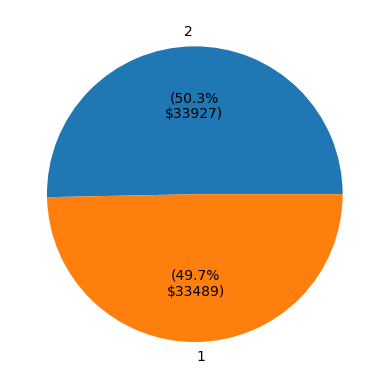

In [20]:
Store_Sales = pd.DataFrame(rows)
Store_Sales.columns = ["Store_Number", "Total_Sales"]
Store_Sales["Total_Sales"] = pd.to_numeric(Store_Sales["Total_Sales"])


def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return "({:.1f}%\n${:d})".format(pct, absolute)


plt.pie(
    Store_Sales["Total_Sales"],
    labels=Store_Sales["Store_Number"],
    autopct=lambda pct: func(pct, Store_Sales["Total_Sales"]),
)
print(Store_Sales.info())
plt.show()

In [21]:
# - Create a python function that will display a graphic the showcases the top N genres by gross revenue.

In [28]:
query = "SELECT c.name, SUM(p.amount) FROM category c FULL JOIN film_category fc ON c.category_id = fc.category_id FULL JOIN inventory i  ON fc.film_id = i.film_id FULL JOIN rental r ON i.inventory_id = r.inventory_id FULL JOIN payment p ON r.rental_id = p.rental_id GROUP BY c.name ORDER BY SUM ASC"
cursor.execute(query)
rows = cursor.fetchall()

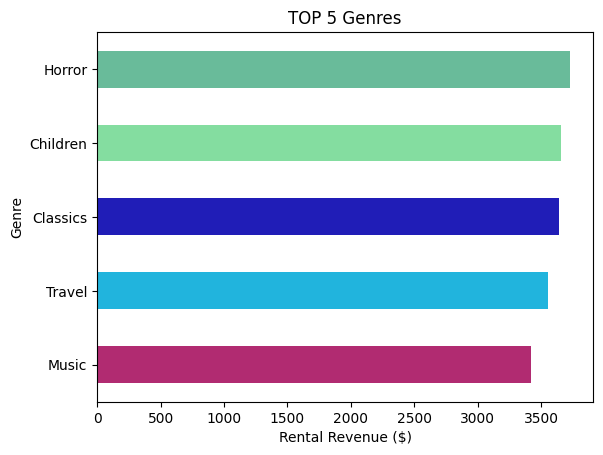

In [41]:
def top_n(n):
    Top_genre = pd.DataFrame(rows)
    Top_genre.columns = ["Genre", "Total_Sales"]
    Top_genre["Total_Sales"] = pd.to_numeric(Top_genre["Total_Sales"])
    color = []
    #Make random color list for plot
    j = len(range(n))
    for i in range(j):
        color.append("#%06X" % randint(0, 0xFFFFFF))
    #Plot top n genres and assign color to color list from above
    Top_genre[0:n].plot.barh(
        x="Genre",
        y="Total_Sales",
        color = color,
        legend=False
    )
    plt.title("TOP {} Genres".format(n))
    plt.xlabel("Rental Revenue ($)")
    plt.show()


top_n(5)

In [43]:
# - Create a graphic showing the average replacement cost by category

In [42]:
query = "SELECT c.name, AVG(f.replacement_cost) FROM film f FULL JOIN film_category fc ON f.film_id = fc.film_id FULL JOIN category c ON fc.category_id = c.category_id GROUP BY name  ORDER BY AVG DESC"
cursor.execute(query)
rows = cursor.fetchall()

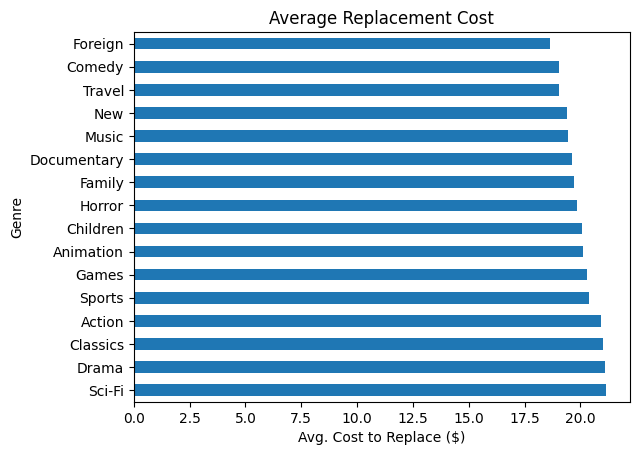

In [52]:
Replace_Cost = pd.DataFrame(rows)
Replace_Cost.columns = ["Genre", "Avg_Replacement_Cost"]
Replace_Cost["Avg_Replacement_Cost"] = pd.to_numeric(Replace_Cost["Avg_Replacement_Cost"])
Replace_Cost.head()
Replace_Cost.plot.barh(x="Genre", y="Avg_Replacement_Cost", legend=False)
plt.title("Average Replacement Cost")
plt.xlabel("Avg. Cost to Replace ($)")
plt.show()

In [ ]:
# - Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)

In [80]:
query = "SELECT rating, COUNT(rating) FROM film GROUP BY rating ORDER BY COUNT"
cursor.execute(query)
rows = cursor.fetchall()

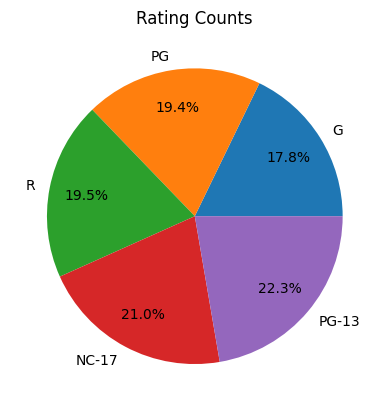

In [90]:
Ratings = pd.DataFrame(rows)
Ratings
Ratings.columns = ["Rating", "Rating_Count"]
Ratings["Rating_Count"] = pd.to_numeric(Ratings["Rating_Count"])
plt.pie(
    Ratings["Rating_Count"],
    labels=Ratings["Rating"],
    autopct="%0.1f%%",
    pctdistance=0.75,
    labeldistance=1.1,
)
plt.title("Rating Counts")
plt.show()

In [ ]:
# - For each category, on average how many rentals of a film need to occur to cover the replacement cost?

In [63]:
query = "SELECT c.name, CEILING(AVG(f.replacement_cost)/AVG(f.rental_rate)) as Num_rentals FROM film f FULL JOIN film_category fc ON f.film_id = fc.film_id FULL JOIN category c ON fc.category_id = c.category_id GROUP BY name"
cursor.execute(query)
rows = cursor.fetchall()

In [64]:
Num_Rentals = pd.DataFrame(rows)
Num_Rentals.columns = ["Genre", "Rentals_to_Cover"]

Num_Rentals["Rentals_to_Cover"] = pd.to_numeric(Num_Rentals["Rentals_to_Cover"])
Num_Rentals

,Genre,Rentals_to_Cover
0,Sports,7.0
1,Classics,8.0
2,New,7.0
3,Family,8.0
4,Comedy,7.0
5,Animation,8.0
6,Travel,6.0
7,Music,7.0
8,Drama,7.0
9,Horror,7.0


## 3. Analysis

In [ ]:
# The owner of these rental stores is working on making an infographic to share with investors that will showcase how each store is doing financially.  
# She wants you to create at least 4 graphics that she can include in her presentation that will be relevant to her.  
# These graphics should be designed to provide a clear, concise, and visually appealing overview of how the stores are doing.
# Please ensure all your work is in a github repository.  It should be named firstname-lastname-pagila-assignment
# (For me it would be max-feige-pagila-assignment)

In [75]:
# IMPORT film TABLE
cursor.execute("SELECT * FROM film")
rows = cursor.fetchall()
film = pd.DataFrame(rows)
film.columns = ["film_id", "title","description","release_year","language_id","original_language_id","rental_duration","rental_rate","length","replacement_cost","rating", "last_update","special_features","fulltext"]
film.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,2022-09-10 16:46:03.905795+00:00,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,2022-09-10 16:46:03.905795+00:00,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,2022-09-10 16:46:03.905795+00:00,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,2022-09-10 16:46:03.905795+00:00,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,2022-09-10 16:46:03.905795+00:00,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...


In [70]:
# IMPORT INVENTORY TABLE
cursor.execute("SELECT * FROM inventory")
rows = cursor.fetchall()
inventory = pd.DataFrame(rows)
inventory.columns = ["inventory_id", "film_id", "store_id", "last_update"]
inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2022-02-15 10:09:17+00:00
1,2,1,1,2022-02-15 10:09:17+00:00
2,3,1,1,2022-02-15 10:09:17+00:00
3,4,1,1,2022-02-15 10:09:17+00:00
4,5,1,2,2022-02-15 10:09:17+00:00


In [65]:
#IMPORT CUSTOMER TABLE
cursor.execute("SELECT * FROM customer")
rows = cursor.fetchall()
customer = pd.DataFrame(rows)
customer.columns = [
    "customer_id",
    "store_id",
    "first_name",
    "last_name",
    "email",
    "address_id",
    "activebool",
    "create_date",
    "last_update",
    "active",
]
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2022-02-14,2022-02-15 09:57:20+00:00,1
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2022-02-14,2022-02-15 09:57:20+00:00,1
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2022-02-14,2022-02-15 09:57:20+00:00,1
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2022-02-14,2022-02-15 09:57:20+00:00,1
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2022-02-14,2022-02-15 09:57:20+00:00,1


In [66]:
#IMPORT PAYMENT TABLE
import matplotlib.pyplot as plt
cursor.execute("SELECT * FROM payment")
rows = cursor.fetchall()
payment = pd.DataFrame(rows)
payment.columns = [
    "payment_id",
    "customer_id",
    "staff_id",
    "rental_id",
    "amount",
    "payment_date",
]
display(payment.head())


,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00


In [67]:
# IMPORT RENTAL TABLE
cursor.execute("SELECT * FROM rental")
rows = cursor.fetchall()
rental = pd.DataFrame(rows)
rental.columns = [
    "rental_id",
    "rental_date",
    "inventory_id",
    "customer_id",
    "return_date",
    "staff_id",
    "last_update",
]
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2022-05-24 21:54:33+00:00,1525,459,2022-05-28 18:40:33+00:00,1,2022-02-16 02:30:53+00:00
1,3,2022-05-24 22:03:39+00:00,1711,408,2022-06-01 21:12:39+00:00,1,2022-02-16 02:30:53+00:00
2,4,2022-05-24 22:04:41+00:00,2452,333,2022-06-03 00:43:41+00:00,2,2022-02-16 02:30:53+00:00
3,5,2022-05-24 22:05:21+00:00,2079,222,2022-06-02 03:33:21+00:00,1,2022-02-16 02:30:53+00:00
4,6,2022-05-24 22:08:07+00:00,2792,549,2022-05-27 00:32:07+00:00,1,2022-02-16 02:30:53+00:00


In [69]:
# IMPORT STORE TABLE
cursor.execute("SELECT * FROM store")
rows = cursor.fetchall()
store = pd.DataFrame(rows)
store.columns = [
    "store_id",
    "manager_staff_id",
    "address_id",
    "last_update",
]
store.head()

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2022-02-15 09:57:12+00:00
1,2,2,2,2022-02-15 09:57:12+00:00


In [76]:
display("customer", customer.head(1))
display("payment", payment.head(1))
display("rental", rental.head(1))
display("inventory", inventory.head(1))
display("film", film.head(1))

'customer'

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2022-02-14,2022-02-15 09:57:20+00:00,1


'payment'

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00


'rental'

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2022-05-24 21:54:33+00:00,1525,459,2022-05-28 18:40:33+00:00,1,2022-02-16 02:30:53+00:00


'inventory'

,inventory_id,film_id,store_id,last_update
0,1,1,1,2022-02-15 10:09:17+00:00


'film'

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,2022-09-10 16:46:03.905795+00:00,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [134]:
#CLEAN DATA 
#MERGE payment, customer, rental, film
film = film[["film_id","title","rental_duration","rental_rate","replacement_cost"]]
film['rental_charge'] = film["rental_duration"]*film["rental_rate"]
customer = customer[["customer_id","store_id"]]
rental = rental[["rental_id","rental_date","inventory_id","customer_id","return_date","staff_id"]]
inventory = inventory[["inventory_id","film_id","store_id"]]
print("inventory",inventory.shape,"film",film.shape)
newone = inventory.merge(film,on="film_id")
print("1st merge",newone.shape,"rental",rental.shape)
newtwo = newone.merge(rental,on="inventory_id")
print("2nd merge",newtwo.shape,"payment",payment.shape)
newthree = newtwo.merge(payment,on = "rental_id")
print("3rd merge",newthree.shape)
# newthree.head(20)
payment["payment_id"].nunique()
#["customer_id","rental_id","staff_id"]

inventory (4581, 3) film (1000, 6)
1st merge (4581, 8) rental (16044, 6)
2nd merge (16044, 13) payment (16049, 5)
3rd merge (16049, 17)


16049

In [ ]:
film = film[["film_id", "title", "rental_duration", "rental_rate", "replacement_cost"]]
film["rental_charge"] = film["rental_duration"] * film["rental_rate"]
film.head(1)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00


599
16049


<Axes: xlabel='Number_rentals', ylabel='Total_Paid'>

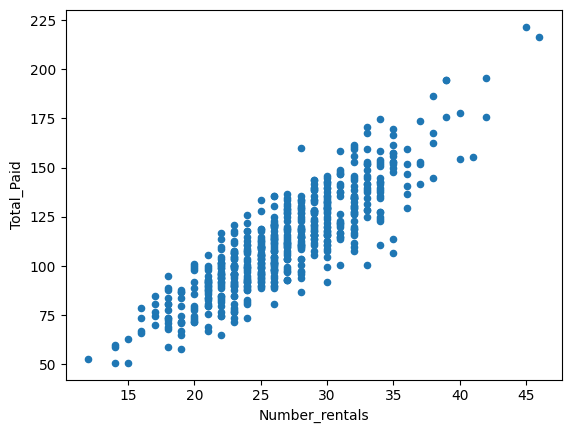

In [ ]:
import matplotlib.pyplot as plt

cursor.execute("SELECT * FROM payment")
rows = cursor.fetchall()
payment = pd.DataFrame(rows)
payment.columns = [
    "payment_id",
    "customer_id",
    "staff_id",
    "rental_id",
    "amount",
    "payment_date",
]
display(payment.head())
num_customers = payment["customer_id"].nunique()
print(num_customers)
print(len(payment))
cust_pays = payment[["customer_id", "rental_id", "amount"]]
cust_pays = cust_pays.sort_values(by="customer_id")
cust_pays = pd.DataFrame(
    cust_pays.groupby("customer_id")[["rental_id", "amount"]].agg(["count", "sum"])
)
cust_pays.drop(columns=[("rental_id", "sum"), ("amount", "count")], inplace=True)
cust_pays = cust_pays.reset_index(level="customer_id")
cust_pays.columns = ["Customer_ID","Number_rentals", "Total_Paid"]
cust_pays.sort_values("Total_Paid", ascending=False)
cust_pays.plot.scatter(x="Number_rentals",y="Total_Paid")